In [20]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../functions')
from model import get_unet
from data import load_data
from keras import backend as K
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
x, y = load_data('../data/')

100%|██████████| 5088/5088 [00:02<00:00, 2070.72it/s]


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
from keras.optimizers import Adam

model = get_unet(input_shape = (128, 128, 3))

In [21]:
callbacks = [
    EarlyStopping(monitor='val_acc', patience=3, verbose=0)
]

In [22]:
model.fit(x_train, y_train, validation_split = 0.166, epochs = 100, callbacks = callbacks)

Train on 2842 samples, validate on 566 samples
Epoch 1/100
2842/2842 [==============================] - 453s 159ms/step - loss: 2.3803 - acc: 0.8401 - val_loss: 2.6232 - val_acc: 0.8357
Epoch 2/100
2842/2842 [==============================] - 4646s 2s/step - loss: 1.0799 - acc: 0.9216 - val_loss: 1.5039 - val_acc: 0.9012
Epoch 3/100
2842/2842 [==============================] - 458s 161ms/step - loss: 0.6523 - acc: 0.9482 - val_loss: 1.2960 - val_acc: 0.9135
Epoch 4/100
2842/2842 [==============================] - 465s 163ms/step - loss: 0.5247 - acc: 0.9560 - val_loss: 0.9481 - val_acc: 0.9337
Epoch 5/100
2842/2842 [==============================] - 457s 161ms/step - loss: 0.4404 - acc: 0.9605 - val_loss: 0.7638 - val_acc: 0.9436
Epoch 6/100
2842/2842 [==============================] - 457s 161ms/step - loss: 0.3882 - acc: 0.9625 - val_loss: 0.6140 - val_acc: 0.9506
Epoch 7/100
2842/2842 [==============================] - 457s 161ms/step - loss: 0.3330 - acc: 0.9636 - val_loss: 0.4298 

In [23]:
model.save_weights('../weights/unet_weights.h5')

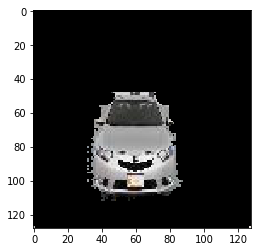

In [42]:
import numpy as np
im_num = 2
prediction = np.expand_dims(model.predict(x_train[im_num:im_num + 1])[0, :, :, 0] > .1, axis = 2)
plt.imshow(np.multiply(x_train[im_num], np.concatenate((prediction, prediction, prediction), axis = 2)))